# Customer Segmentation using K-Means
This project segments customers into different groups using **K-Means clustering** based on their annual income and spending score. The dataset used is `Mall_Customers.csv`.

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 2. Load Dataset
# Make sure Mall_Customers.csv is in the same folder as this notebook
df = pd.read_csv("Mall_Customers.csv")
print("Data Shape:", df.shape)
df.head()

Data Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 3. Data Overview
print(df.info())
print(df.describe())

# Check missing values
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

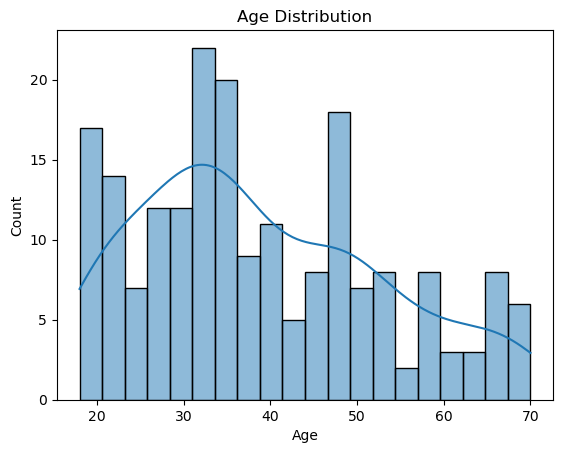

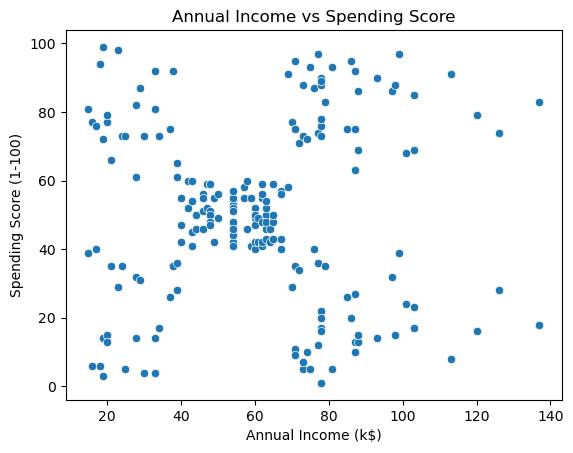

In [4]:
# 4. Exploratory Data Analysis (EDA)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

In [5]:
# 5. Feature Selection
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

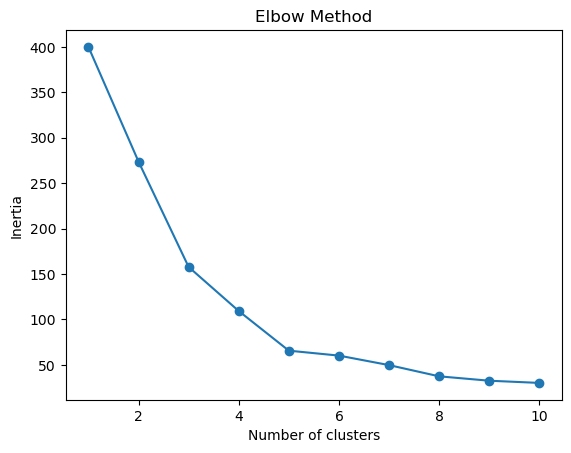

In [6]:
# 6. Finding Optimal Number of Clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
# 7. Apply K-Means with chosen clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

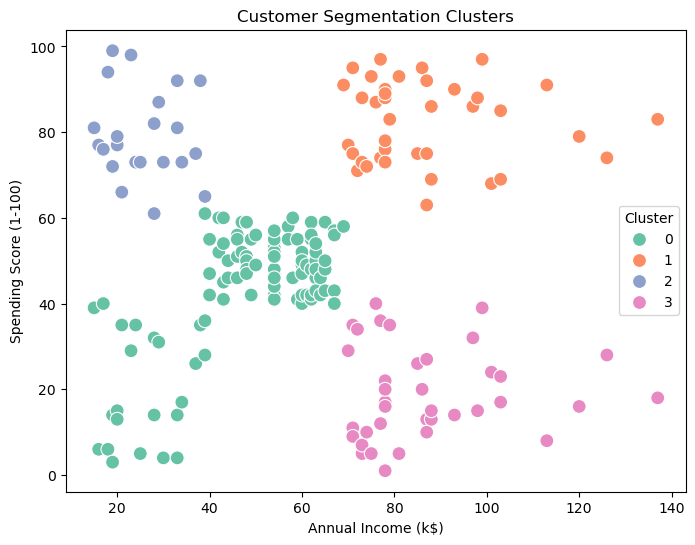

In [8]:
# 8. Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', 
                data=df, palette='Set2', s=100)
plt.title("Customer Segmentation Clusters")
plt.show()

In [9]:
# 9. Cluster Analysis
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 48.168317               43.396040
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 87.000000               18.631579


# 10. Insights
- **Cluster 0** → High income, high spending (Premium customers)  
- **Cluster 1** → Low income, low spending (Budget customers)  
- **Cluster 2** → High income, low spending (Careful spenders)  
- **Cluster 3** → Moderate income, high spending (Potential loyal customers)  